In [1]:
import time, functools, torch, os, random, utils, fnmatch, psutil, argparse
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nnz
import torch.nn.functional as F
from torch.optim import Adam, Adamax
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from trans_tdsm1 import Gen, loss_fn, pc_sampler
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D

In [2]:
workingdir = "./"
print('torch version: ', torch.__version__)
global device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Running on device: ', device)
if torch.cuda.is_available():
    print('Cuda used to build pyTorch: ',torch.version.cuda)
    print('Current device: ', torch.cuda.current_device())
    print('Cuda arch list: ', torch.cuda.get_arch_list())

print('Working directory: ', workingdir)

torch version:  2.0.1+cu117
Running on device:  cuda
Cuda used to build pyTorch:  11.7
Current device:  0
Cuda arch list:  ['sm_37', 'sm_50', 'sm_60', 'sm_70', 'sm_75', 'sm_80', 'sm_86']
Working directory:  ./


In [3]:
from toy_generator import generate_event
result = generate_event(max_energy=200, nevent=20000, nlayer=5)
print("max number of hits", result[0][0].shape[0])
print("nfeatures", result[0][0].shape[1])
print("nEvents", result[1].shape[0])

max number of hits 150
nfeatures 4
nEvents 20000


In [4]:
from copy import deepcopy
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer


qt = QuantileTransformer(n_quantiles=5, random_state=0)
# You may need to run several times until it succeeds.
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

vesde = utils.VESDE(device=device)
batch_size = 150

new_marginal_prob_std_fn = functools.partial(vesde.marginal_prob)
new_diffusion_coeff_fn   = functools.partial(vesde.sde)

training_file_path = 'dataset/toy_model.pt'
filename = training_file_path
loaded_file = torch.load(filename, map_location=torch.device(device))

inject_energy = loaded_file[1]
events        = loaded_file[0]

training_dataset = events[:10000]
training_inject_energy = inject_energy[:10000]
#print(training_inject_energy)
testing_dataset  = events[10000:]
testing_inject_energy  = inject_energy[10000:]
counter=0

#hello=torch.tensor()



global original_energy
original_energy = []
global original_x 
original_x = []
global original_y 
original_y = []
global original_z 
original_z= []



for i, data in enumerate(training_dataset,0):
        
        valid_event = []
        data_np   = data.cpu().numpy().copy()
        #energy_np = energy.cpu().numpy().copy()
      
    
        mask = data_np[:,0] != -20
        for j in range(len(data_np)):
            valid_event += ((data_np[j][mask[j]]).tolist())
        valid_event = np.array(valid_event)
        
        original_energy += deepcopy((valid_event)[:,0]).flatten().tolist()
        original_x += deepcopy((valid_event)[:,1]).flatten().tolist()
        original_y += deepcopy((valid_event)[:,2]).flatten().tolist()
        original_z += deepcopy((valid_event)[:,3]).flatten().tolist()
        #data[:,0] = torch.Tensor((valid_event)[:,0].flatten())
        #data[:,1] = torch.Tensor((valid_event)[:,1].flatten())
        #data[:,2] = torch.Tensor((valid_event)[:,2].flatten())
        #data[:,3] = torch.Tensor((valid_event)[:,3].flatten())
        
        

# print(torch.Tensor(training_dataset[:][:][0][1]).reshape(-1,1))       
# hello=torch.cat(training_dataset)
# yellow=trans_e.fit(torch.Tensor(training_dataset[:][:][0][1]).reshape(-1,1))
# blue=yellow.transform(training_dataset[:][:][0][1].reshape(-1,1))
# print(blue)
# hello[:,0]=torch.Tensor(trans_e.fit_transform(hello[:,0].reshape(-1,1))).flatten()
# hello[:,1]=torch.Tensor(trans_x.fit_transform(hello[:,1].reshape(-1,1))).flatten()
# hello[:,2]=torch.Tensor(trans_y.fit_transform(hello[:,2].reshape(-1,1))).flatten()
# hello[:,3]=torch.Tensor(trans_z.fit_transform(hello[:,3].reshape(-1,1))).flatten()

# op=hello.chunk(1000)
# print(op)
# print(hello[:,0])
# print(hello.size()[0])

# training_dataset=op
#print(len(really))
#really=np.array(really)
#print(really)
#print(type(really))
#print(really[:,0])
    
# print(type(a))

        
#dataloader = DataLoader(training_dataset, batch_size=batch_size, shuffle=False)
print("I am done")

I am done


this is new
tensor([[3.7563, 3.5378, 3.3199, 1.0000],
        [3.0532, 3.6268, 3.5299, 1.0000],
        [3.8732, 3.6057, 3.6077, 1.0000],
        [3.6837, 3.3397, 3.3415, 1.0000],
        [3.8925, 3.0532, 3.1642, 2.0000],
        [3.4972, 3.8050, 3.6033, 2.0000],
        [3.0481, 3.2009, 3.8025, 2.0000],
        [3.6556, 3.6879, 3.4051, 2.0000],
        [3.6312, 3.3191, 3.8648, 2.0000],
        [3.8534, 3.3998, 3.5666, 2.0000],
        [3.6264, 3.3514, 3.2776, 2.0000],
        [3.9182, 3.1851, 3.6696, 2.0000],
        [3.8177, 3.6641, 3.3530, 2.0000],
        [3.8824, 3.4170, 3.3239, 2.0000],
        [3.0790, 3.6430, 3.6793, 3.0000],
        [3.9609, 3.5442, 3.5829, 3.0000],
        [3.6080, 3.7970, 3.3719, 3.0000],
        [3.9588, 3.7109, 3.7551, 3.0000],
        [3.8267, 3.8358, 3.2625, 3.0000],
        [3.9129, 3.3866, 3.8179, 3.0000],
        [3.4038, 3.4245, 3.6741, 3.0000],
        [3.9563, 3.8262, 3.1712, 3.0000],
        [3.8114, 3.8472, 3.3590, 3.0000],
        [3.2579, 3.913

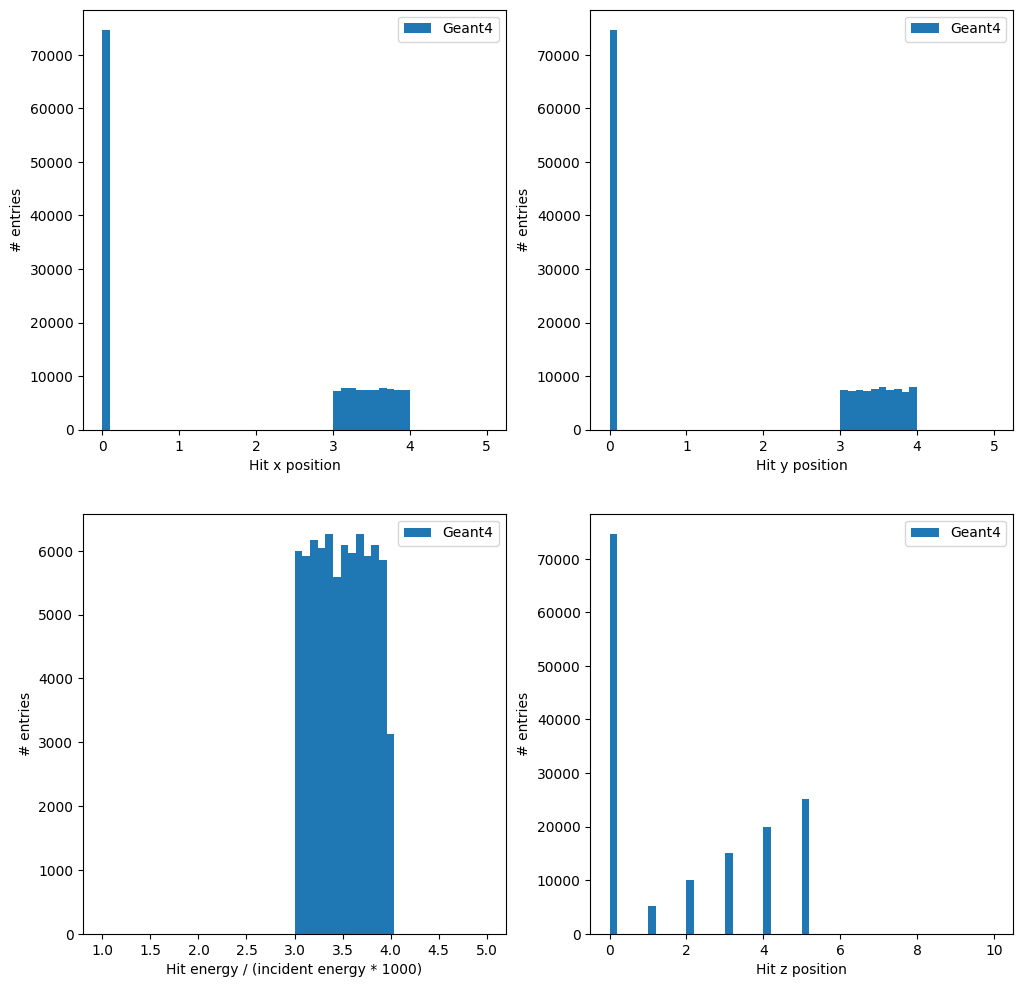

1500000


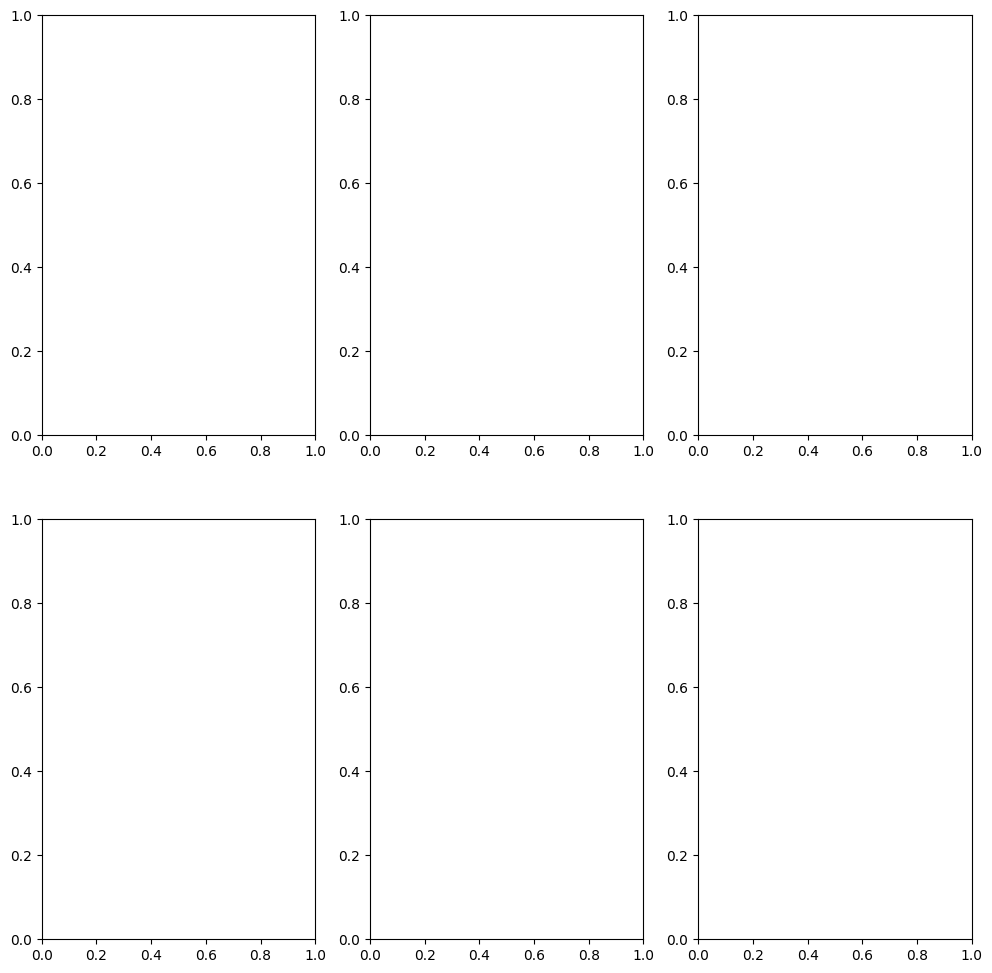

In [5]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=5, random_state=0)

def summarize_result(samples, energy, threshold= 0.1, label = ""):
    
    global all_x 

    all_x = []
    global all_y 
    all_y = []
    global all_z 
    all_z = []
    global all_e 
    all_e = []
    global entries_training
    entries_training = []
    inject_energy = []
    lin=np.linspace(0,20,10000,endpoint=True)
    print("this is new")
    global all_x_tensor
    all_x_tensor = np.array([])
    global all_y_tensor
    all_y_tensor = np.array([])
    global all_z_tensor
    all_z_tensor = np.array([])
    global all_e_tensor
    all_e_tensor = np.array([])
    global dataset_transformed
    dataset_transformed = np.array([])
    global dataset_transformed_list
    dataset_transformed_list = []
    global subset_x
    subset_x = []
    global subset_y
    subset_y = []
    global subset_z
    subset_z = []
    global subset_e
    subset_e = []
    global subset_entries_training
    subset_entries_training = []
    global subset_training_inject_energy
    subset_training_inject_energy = []

    for i, data in enumerate(samples,0):
        
        valid_event = []
        data_np   = data.cpu().numpy().copy()
        energy_np = energy.cpu().numpy().copy()
        mask = data_np[:,3] !=-20
        valid_event = data_np[mask]

        if len(valid_event) == 0:
            continue
        valid_event = np.array(valid_event)
        
        #print(valid_event.shape[0])
        
        
        all_e_tensor = np.append(all_e_tensor,((valid_event).copy()[:,0]).reshape(-1,1))
        all_x_tensor = np.append(all_x_tensor,((valid_event).copy()[:,1]).reshape(-1,1))
        all_y_tensor = np.append(all_y_tensor,((valid_event).copy()[:,2]).reshape(-1,1))
        all_z_tensor = np.append(all_z_tensor,((valid_event).copy()[:,3]).reshape(-1,1))
        entries_training.append(len(valid_event))
        inject_energy.append(energy_np[i])
        
    
    all_e_tensor =torch.Tensor(all_e_tensor).reshape(-1,1)
    all_x_tensor =torch.Tensor(all_x_tensor).reshape(-1,1)
    all_y_tensor =torch.Tensor(all_y_tensor).reshape(-1,1)
    all_z_tensor =torch.Tensor(all_z_tensor).reshape(-1,1)
    
    global transform_e
    global transform_x
    global transform_y
    global transform_z

    transform_e = QuantileTransformer().fit(all_e_tensor) 
    transform_x = QuantileTransformer().fit(all_x_tensor)
    transform_y = QuantileTransformer().fit(all_y_tensor)
    #transform_z = MinMaxScaler().fit(all_z_tensor)

    #print("trans",transform_e.transform(all_e_tensor))
    for showers in samples:
        valid_event = []
        data_np   = showers.cpu().numpy().copy()
        energy_np = energy.cpu().numpy().copy()
        mask = data_np[:,3] != -20
        valid_event = data_np[mask]

        if len(valid_event) == 0:
            continue
        valid_event = np.array(valid_event)
        
        pad_hits = result[0][0].shape[0]-valid_event.shape[0]
        E_ = np.asarray(valid_event[:,0]).reshape(-1, 1)
        X_ = np.asarray(valid_event[:,1]).reshape(-1, 1)
        Y_ = np.asarray(valid_event[:,2]).reshape(-1, 1)
        Z_ = np.asarray(valid_event[:,3]).reshape(-1, 1)
        E_ = transform_e.transform(E_)
        X_ = transform_x.transform(X_)
        Y_ = transform_y.transform(Y_)
        #Z_ = transform_z.transform(Z_)
        E_ = torch.from_numpy( E_.flatten()+3.0 )
        X_ = torch.from_numpy( X_.flatten()+3.0 )
        Y_ = torch.from_numpy( Y_.flatten()+3.0 )
        Z_ = torch.from_numpy( Z_.flatten() )
        shower_data_transformed = torch.stack((E_,X_,Y_,Z_), -1)
        padded_shower = F.pad(input = shower_data_transformed, pad=(0,0,0,pad_hits), mode='constant', value=0.0)
        dataset_transformed_list.append(padded_shower)
        #padded_shower = F.pad(input = shower_data_transformed, pad=(0,0,0,pad_hits), mode='constant', value=-20)
        #padded_showers.append(padded_shower)
        #shower_count+=1

    
    for i, data in enumerate(dataset_transformed_list,0):
        
        valid_event = []
        data_np   = data.cpu().numpy().copy()
        energy_np = energy.cpu().numpy().copy()
        mask = data_np[:,1] != 0.0
        valid_event = data_np[mask]

        if len(valid_event) == 0:
            continue
        valid_event = np.array(valid_event)
        
        #print(valid_event.shape[0])
        
        all_e += ((data_np).copy()[:,0]).flatten().tolist()
        all_x += ((data_np).copy()[:,1]).flatten().tolist()
        all_y += ((data_np).copy()[:,2]).flatten().tolist()
        all_z += ((data_np).copy()[:,3]).flatten().tolist()
        
    print(dataset_transformed_list[0])



    # Assuming all_x, all_y, all_e, and all_z are your data lists
    total_samples = len(all_x)
    total_samples_1 = len(entries_training)
    total_samples_2 = len(training_inject_energy)
    subset_size = total_samples // 10  # Select 1/10 of the data
    subset_size_1 = total_samples_1 // 10  # Select 1/10 of the data
    subset_size_2 = total_samples_2 // 10  # Select 1/10 of the data
    
    # Generate random indices to select a random subset
    random_indices = np.random.choice(total_samples, size=subset_size, replace=False)
    random_indices_1 = np.random.choice(total_samples_1, size=subset_size_1, replace=False)
    random_indices_2 = np.random.choice(total_samples_2, size=subset_size_2, replace=False)
    
    
    # Create subsets of your data
    subset_x = [all_x[i] for i in random_indices]
    subset_y = [all_y[i] for i in random_indices]
    subset_e = [all_e[i] for i in random_indices]
    subset_z = [all_z[i] for i in random_indices]
    subset_entries_training = [entries_training[i] for i in random_indices_1]
    subset_training_inject_energy = [training_inject_energy[i] for i in random_indices_2]
    
    # Now, you can plot the subsets
    plt.figure(figsize=(12, 12))
    
    plt.subplot(2, 2, 1)
    plt.hist(subset_x, 50, range=(0, 5), label=label)
    plt.xlabel('Hit x position')
    plt.ylabel('# entries')
    plt.legend(loc='upper right')
    
    plt.subplot(2, 2, 2)
    plt.hist(subset_y, 50, range=(0, 5.0), label=label)
    plt.xlabel('Hit y position')
    plt.ylabel('# entries')
    plt.legend(loc='upper right')
    
    plt.subplot(2, 2, 3)
    plt.hist(subset_e, 50, range=(1, 5), label=label)
    plt.xlabel('Hit energy / (incident energy * 1000)')
    plt.ylabel('# entries')
    plt.legend(loc='upper right')
    
    plt.subplot(2, 2, 4)
    plt.hist(subset_z, 50, range=(0, 10), label=label)
    plt.xlabel('Hit z position')
    plt.ylabel('# entries')
    plt.legend(loc='upper right')
    
    plt.show()

    #all_x=trans_x.inverse_transform(torch.Tensor(all_x).reshape(-1,1)).flatten().tolist()
    fig, ax = plt.subplots(2,3, figsize=(12,12))

    # ax[0][0].set_ylabel('# entries')
    # ax[0][0].set_xlabel('Hit entries')
    # ax[0][0].hist(entries_training, 200, range=(0,200), label=label)
    # ax[0][0].legend(loc='upper right')

    # ax[0][1].set_ylabel('# entries')
    # ax[0][1].set_xlabel('Hit energy / (incident energy * 1000)')
    # ax[0][1].hist(all_e, 50, range=(1,5), label=label)
    # ax[0][1].legend(loc='upper right')

    # ax[0][2].set_ylabel('# entries')
    # ax[0][2].set_xlabel('Injection energy')
    # #ax[0][2].hist(training_inject_energy, 50, range=(0,200), label=label, color='red')
    # ax[0][2].hist(inject_energy, 50, range=(0,200), label=label, color='blue')
    # ax[0][2].legend(loc='upper right')

    # ax[1][2].set_ylabel('# entries')
    # ax[1][2].set_xlabel('Hit x position')
    # ax[1][2].hist(all_x_tensor, 50, range=(1,5), label=label)
    # #ax[1][2].hist(original_x[:182574], 50, range=(-20,20), color='red')
    # ax[1][2].legend(loc='upper right')

    # ax[1][0].set_ylabel('# entries')
    # ax[1][0].set_xlabel('Hit y position')
    # ax[1][0].hist(all_y, 50, range=(1,5.0), label=label)
    # #ax[1][0].hist(original_y[:182590], 50, range=(-20,20), color='red')
    # ax[1][0].legend(loc='upper right')

    # ax[1][1].set_ylabel('# entries')
    # ax[1][1].set_xlabel('Hit z position')
    # ax[1][1].hist(all_z, 50, range=(0,10), label=label)
    # #ax[1][1].hist(original_z[:182559], 50, range=(-20,20), color='red')
    # ax[1][1].legend(loc='upper right')
    # fig.show()
    # fig.savefig("test.png")
summarize_result(training_dataset, training_inject_energy, threshold=0.1, label = "Geant4")
print(len(all_x))
training_dataset=dataset_transformed_list
output_directory = os.path.join(workingdir, 'sampling')

#training_dataset=dataset_transformed
dataloader = DataLoader(dataset_transformed_list, batch_size=batch_size, shuffle=False)

training_dataset=dataset_transformed_list

#c=torch.FloatTensor(all_x)
#d=(c>0)
#e=[]
#e = c[d]
#f=(e>=-20)
#all_x=e
#print(torch.mean(torch.tensor(all_x)))
#print(torch.std(torch.tensor(all_x)))
#print(dataset_transformed_list[0])
#for i, data in enumerate(dataloader,0):
    #print(data)
    #break
#print(dataloader[0])
#torch.save(dataset_transformed, os.path.join(output_directory,'0728RobustScalar_training_samples.pt'))

  0%|          | 0/1500 [00:00<?, ?it/s]

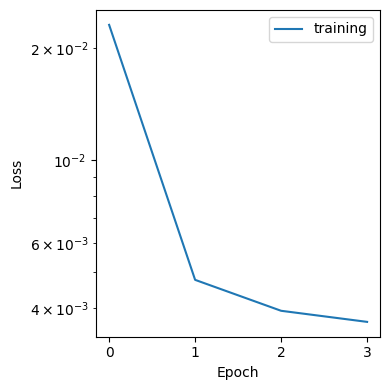

cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

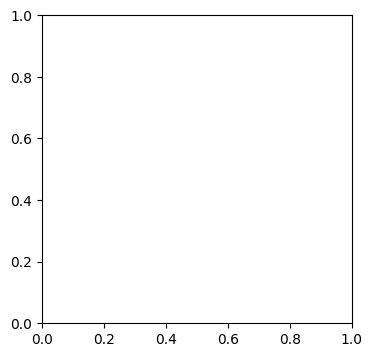

In [ ]:
import tqdm
from tqdm import tqdm_notebook
from IPython import display
import torch.nn as nn
from Conv4d import Conv4d
from tqdm.notebook import tqdm as tqdm_notebook


%matplotlib inline
plt.gcf().canvas.draw()

os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
output_directory = os.path.join(workingdir, 'training_result')
os.system(f'mkdir -p {output_directory}')

lr = 0.0002
n_epochs = 1500




model = Gen(4, 450, 256, 15, 1, 0, marginal_prob_std=new_marginal_prob_std_fn)  #model = Gen(4, 200, 128, 3, 1, 0, marginal_prob_std=new_marginal_prob_std_fn)
#print(model.shape)
#model =CNNnet(4,4)
#model=CNNnet()

#model = net(input)

#print('model: ', model)

optimiser = torch.optim.RAdam(model.parameters(), lr=lr)

av_losses_per_epoch = []
tqdm_epoch = tqdm_notebook(range(n_epochs))

fig, ax = plt.subplots(ncols=1, figsize=(4,4))
dh = display.display(fig, display_id=True)

for epoch in tqdm_epoch:
#    print(f"epoch: {epoch}")
    batch_losses = []
    batch_counter = 0
    cloud_counter = 0
    cumulative_epoch_loss = 0

    process = psutil.Process(os.getpid())
    # 使用psutil 來進行  Python 程序性能分析
#    print('Memory usage of current python process: ', process.memory_info().rss)
    index = 0
    for i, data in enumerate(dataloader,0):
        
        incident_energies = training_inject_energy[i*batch_size: i*batch_size+len(data)]
        #print(training_inject_energy.shape)
        #incident_energies = training_inject_energy[i*batch_size: i*batch_size+150]
        #print(incident_energies.shape[0])
        batch_loss = loss_fn(model, data, incident_energies, new_marginal_prob_std_fn, device=device)
        batch_counter += 1
        cloud_counter += len(data)
#        print(f'Batch{batch_counter}: loss average: ', batch_loss.item()/len(data))
        optimiser.zero_grad()
        batch_loss.backward(retain_graph=True)
        cumulative_epoch_loss += batch_loss.item()
        optimiser.step()
        #if(batch_counter==len(dataloader)):
            #print(batch_loss.item())

    av_losses_per_epoch.append(cumulative_epoch_loss/cloud_counter)
    tqdm_epoch.set_description('Average Loss: {:5f}'.format(cumulative_epoch_loss/cloud_counter))
    # Save checkpoint file after each epoch
    torch.save(model.state_dict(), os.path.join(output_directory,'ckpt_tmp_selfattn15_'+str(epoch)+'.pth'))

    fig, ax = plt.subplots(ncols=1, figsize=(4,4))
    plt.title('')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.yscale('log')
    plt.plot(av_losses_per_epoch, label='training')
    plt.legend(loc='upper right')
    plt.tight_layout()
    dh.update(fig)
    plt.close(fig)
    #fig.savefig(os.path.join(output_directory, 'loss_v_epoch.png'))

In [6]:
import random


output_directory = os.path.join(workingdir, 'sampling')
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

load_name = './training_result/ckpt_tmp_selfattn1_1499.pth'
sample_batch_size = 1000
model = Gen(4, 400, 256, 10, 1, 0, marginal_prob_std=new_marginal_prob_std_fn)
model.load_state_dict(torch.load(load_name, map_location=device))
model.to(device)
in_energies = []
hits_lengths = []
sampled_energies = testing_inject_energy[:sample_batch_size]
#Mask0 = dataset_transformed_list[0][: , 0]!= 0.0
#Mask1 = dataset_transformed_list[1][: , 0]!= 0.0
#dataset_transformed_list[j][mask[j]]
sampled_hits=[]
for i in range(0,sample_batch_size):
    random_number = random.randint(0, 100)
    Mask = dataset_transformed_list[i][: , 0]!= 0.0
    valid_hit = len(dataset_transformed_list[i][Mask])
    sampled_hits.append(valid_hit)
    
#print(sampled_hits)
#sampled_hits = torch.ones(sample_batch_size)*((dataset_transformed_list[0][:,0]*Mask0).shape[0])
#sampled_hits = torch.ones(sample_batch_size)*((dataset_transformed_list[1][:,0]*Mask1).shape[0])
#print(dataset_transformed_list[0][:,0])
#valid_hit=dataset_transformed_list[0][Mask0]
#print(len(valid_hit))
#print("here",Mask0)
#print(dataset_transformed_list[1][:,0]*Mask1.shape[0])
samples = pc_sampler(model, new_marginal_prob_std_fn, new_diffusion_coeff_fn, sampled_energies, sampled_hits, sample_batch_size, device=device)

torch.save(samples, os.path.join(output_directory,'0728RobustScalar_generated_samples.pt'))

padded_hits:  1000
Check padded shower for model: tensor([[[-0.0973,  0.1378, -0.3510, -0.2209],
         [-1.1855, -0.1386, -0.6963,  0.4404],
         [ 0.2859,  2.2383,  0.7826,  0.4853],
         ...,
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000]],

        [[ 0.3382, -0.5788, -0.4624,  1.1044],
         [-0.8475, -0.9962,  2.2660, -0.7699],
         [ 0.1571, -0.2026, -0.6688, -1.0448],
         ...,
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000]],

        [[ 0.9112, -0.6487,  0.8336,  0.4428],
         [-0.0816, -0.5695, -1.8959,  1.4137],
         [-0.7850,  0.9452,  1.9668,  0.3124],
         ...,
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000]],

        ...,

        [[ 0.2268,  1.0958, -0.9256,  0.51

Processing: 100%|██████████| 100/100 [00:50<00:00,  1.97it/s]


this is new
74652
FID of x : tensor(235.6034)
FID of y : tensor(307.2552)
FID of z : tensor(0.1377)
FID of e : tensor(1.0594)
x1mean tensor(-0.0043)
y1mean tensor(0.0050)
z1mean tensor(3.6701)
e1mean tensor(0.3319)
data2_x_mean tensor(14.8483)
y2mean tensor(17.1009)
z2mean tensor(3.3005)
e2mean tensor(1.3183)
x1std tensor(3.8736)
y1std tensor(3.8710)
z1std tensor(1.2482)
e1std tensor(0.2938)
x2std tensor(4.7684e-06)
y2std tensor(5.7221e-06)
z2std tensor(1.2145)
e2std tensor(1.1921e-07)


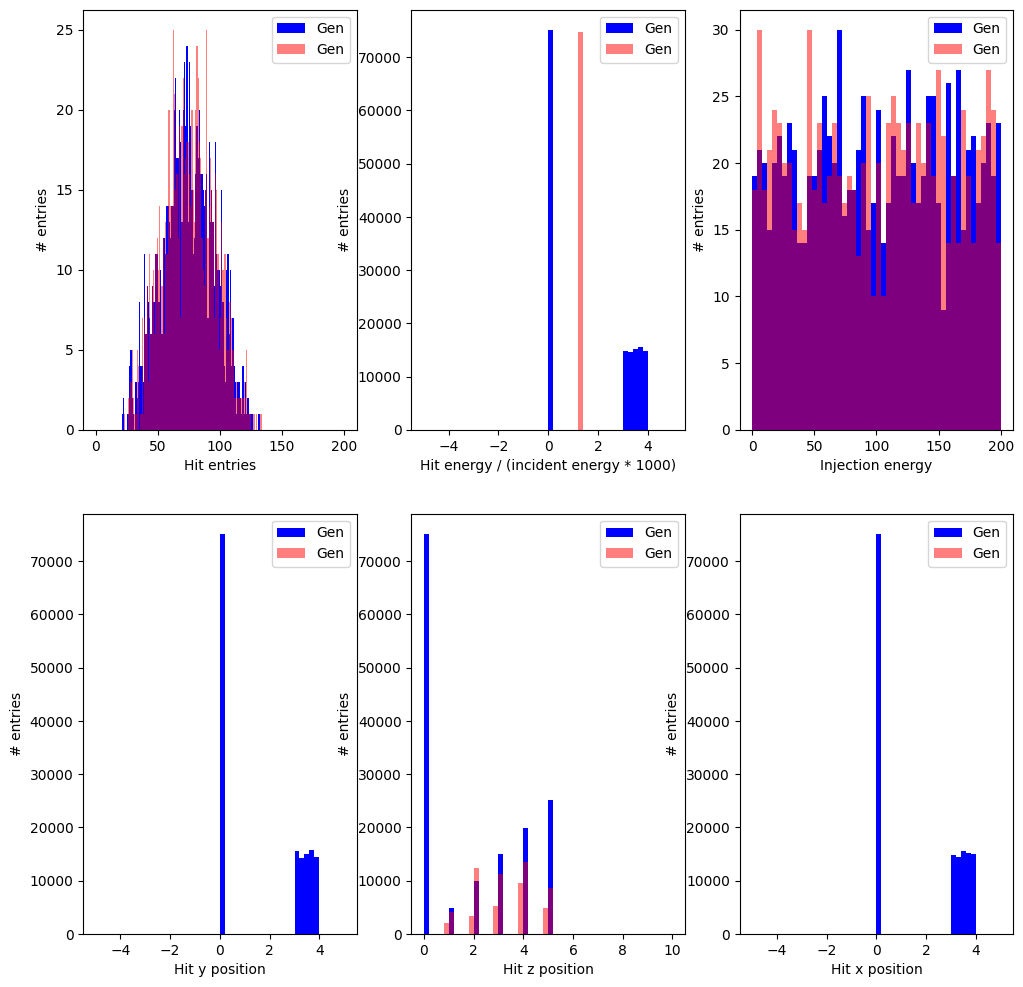

In [ ]:
#from display_result import summarize_result
from scipy.linalg import sqrtm
import torch

#samples=torch.load(os.path.join(output_directory,'0728RobustScalar_generated_samples.pt'))
#fig.savefig("generated_events.png")

#samples=torch.load('sampling/0728RobustScalar_generated_samples.pt')


#dataloader = DataLoader(samples, batch_size=batch_size, shuffle=False)


def summarize_result1(samples, energy, threshold=-2000, label = ""):
    
    global all_x_g
    all_x_g =[]
    global all_y_g 
    all_y_g = []
    global all_z_g 
    all_z_g = []
    global all_e_g 
    all_e_g = []
    global entries
    entries = []
    inject_energy = []
    lin=np.linspace(0,20,10000,endpoint=True)
    print("this is new")
    
    

    for i, data in enumerate(samples,0):
        
        valid_event = []
        #data_np   = data.cpu().numpy().copy()
        data_np   = data.cpu().detach().numpy().copy()
        #energy_np = energy.cpu().numpy().copy()
        energy_np = energy.cpu().numpy().copy()
        
        mask = data_np[:,1] != 0.0
        valid_event = data_np[mask]
        # for j in range(len(data_np)):
        #     valid_event += ((data_np[j][mask[j]]).tolist())
        # valid_event = np.array(valid_event)
        #mask = data_np[:, 0]!=0  # Create the mask
        #valid_event = np.where(mask[:, :, np.newaxis], data_np, 0.0)  # Apply the mask
 # Add a new axis to match dimensions
        # Apply the mask to get the filtered data
  # Assuming you want to filter based on the fourth column

        # Apply the mask to the entire array
        #valid_event = data_np[mask]

        #if len(valid_event) == 0:
            #continue
        #valid_event = np.array(valid_event)
        #output_mask = (x[:,:,0]!=0.0).type(torch.int)
        # data[:,0]=torch.FloatTensor([(float(i))*(torch.max(data[:,0])-torch.min(data[:,0]))+torch.min(data[:,0])for i in (data_np).copy()[:,0].flatten().tolist() ])
        # data[:,1]=torch.FloatTensor([(float(i))*(torch.max(data[:,1])-torch.min(data[:,1]))+torch.min(data[:,1])for i in (data_np).copy()[:,1].flatten().tolist() ])
        # data[:,2]=torch.FloatTensor([(float(i))*(torch.max(data[:,2])-torch.min(data[:,2]))+torch.min(data[:,2])for i in (data_np).copy()[:,2].flatten().tolist() ])
        # data[:,3]=torch.FloatTensor([(float(i))*(torch.max(data[:,3])-torch.min(data[:,3]))+torch.min(data[:,3])for i in (data_np).copy()[:,3].flatten().tolist() ])
        
        # data[:,0]=torch.FloatTensor([(float(i)+0.5)*2*torch.std(data[:,0])+torch.mean(data[:,0]) for i in (data_np).copy()[:,0].flatten().tolist() ])
        # data[:,1]=torch.FloatTensor([(float(i)+0.5)*2*torch.std(data[:,1])+torch.mean(data[:,1]) for i in (data_np).copy()[:,1].flatten().tolist() ])
        # data[:,2]=torch.FloatTensor([(float(i)+0.5)*2*torch.std(data[:,2])+torch.mean(data[:,2]) for i in (data_np).copy()[:,2].flatten().tolist() ])
        # data[:,3]=torch.FloatTensor([(float(i)+0.5)*2*torch.std(data[:,3])+torch.mean(data[:,3]) for i in (data_np).copy()[:,3].flatten().tolist() ])

        
       
        all_e_g += ((valid_event).copy()[:,0]).flatten().tolist()
        all_x_g += ((valid_event).copy()[:,1]).flatten().tolist()
        all_y_g += ((valid_event).copy()[:,2]).flatten().tolist()
        all_z_g += ((valid_event).copy()[:,3]).flatten().tolist()
        entries.append(len(valid_event))
        inject_energy.append(energy_np[i]) 
        #print(all_e_g)
    print(len(all_x_g))
#     samples = pc_sampler(model, new_marginal_prob_std_fn, new_diffusion_coeff_fn, sampled_energies, sampled_hits, sample_batch_size, device=device)
#     for i, data in enumerate(samples,0):
        
#         valid_event = []
#         data_np   = data.cpu().numpy().copy()
#         energy_np = energy.cpu().numpy().copy()
        
#         mask = data_np[:, 3] > 0.0  # Create the mask
#         #valid_event = np.where(mask[:, :, np.newaxis], data_np, 0.0)  # Apply the mask
#  # Add a new axis to match dimensions
#         # Apply the mask to get the filtered data
#   # Assuming you want to filter based on the fourth column

#         # Apply the mask to the entire array
#         valid_event = data_np[mask]

#         if len(valid_event) == 0:
#             continue
#         valid_event = np.array(valid_event)
        #output_mask = (x[:,:,0]!=0.0).type(torch.int)
        # data[:,0]=torch.FloatTensor([(float(i))*(torch.max(data[:,0])-torch.min(data[:,0]))+torch.min(data[:,0])for i in (data_np).copy()[:,0].flatten().tolist() ])
        # data[:,1]=torch.FloatTensor([(float(i))*(torch.max(data[:,1])-torch.min(data[:,1]))+torch.min(data[:,1])for i in (data_np).copy()[:,1].flatten().tolist() ])
        # data[:,2]=torch.FloatTensor([(float(i))*(torch.max(data[:,2])-torch.min(data[:,2]))+torch.min(data[:,2])for i in (data_np).copy()[:,2].flatten().tolist() ])
        # data[:,3]=torch.FloatTensor([(float(i))*(torch.max(data[:,3])-torch.min(data[:,3]))+torch.min(data[:,3])for i in (data_np).copy()[:,3].flatten().tolist() ])
        
        # data[:,0]=torch.FloatTensor([(float(i)+0.5)*2*torch.std(data[:,0])+torch.mean(data[:,0]) for i in (data_np).copy()[:,0].flatten().tolist() ])
        # data[:,1]=torch.FloatTensor([(float(i)+0.5)*2*torch.std(data[:,1])+torch.mean(data[:,1]) for i in (data_np).copy()[:,1].flatten().tolist() ])
        # data[:,2]=torch.FloatTensor([(float(i)+0.5)*2*torch.std(data[:,2])+torch.mean(data[:,2]) for i in (data_np).copy()[:,2].flatten().tolist() ])
        # data[:,3]=torch.FloatTensor([(float(i)+0.5)*2*torch.std(data[:,3])+torch.mean(data[:,3]) for i in (data_np).copy()[:,3].flatten().tolist() ])

        
       
        # all_e_g += ((data_np).copy()[:,0]-3.0).flatten().tolist()
        # all_x_g += ((valid_event).copy()[:,1]-3.0).flatten().tolist()
        # all_y_g += ((valid_event).copy()[:,2]-3.0).flatten().tolist()
        # all_z_g += ((valid_event).copy()[:,3]).flatten().tolist()
        # entries.append(len(valid_event))
        # inject_energy.append(energy_np[i])
    
    #has_nan = any(math.isnan(x) for x in all_x_g)

    #if has_nan:
        #print("There are NaN values in the list.")
    #else:
        #print("There are no NaN values in the list.")
    #c=torch.FloatTensor(all_x_g)
    #d = (c >= 0.3)
    #e=[]
    #e = c[d]
    #all_x_g=e
    #c=torch.FloatTensor(all_y_g)
    #d = (c >= 0.3)
    #e=[]
    #e = c[d]
    #all_y_g=e
    #print(len(all_x_g))
# #print("test",torch.mean(all_x_g))
    #c=torch.FloatTensor(all_z_g)
    #d = (c <= 1.0) & (c >= 0.0)
    #e=[]
    #e = c[d]
    #all_z_g=e
    #print(all_e_g[0])
    #all_e_g=transform_e.inverse_transform(torch.Tensor(all_e_g).reshape(-1,1)).flatten().tolist()
    #all_x_g=transform_x.inverse_transform(torch.Tensor(all_x_g).reshape(-1,1)).flatten().tolist()
    #all_y_g=transform_y.inverse_transform(torch.Tensor(all_y_g).reshape(-1,1)).flatten().tolist()
    #all_z_g=transform_z.inverse_transform(torch.Tensor(all_z_g).reshape(-1,1)).flatten().tolist()
    fig, ax = plt.subplots(2,3, figsize=(12,12))
    c=torch.FloatTensor(all_e_g)
    d=(c<=20)
    e=[]
    e = c[d]
    f=(e>=-20)
    #all_e_g=e[f]
 
    c=torch.FloatTensor(all_x_g)
    d=(c<=15)
    e=[]
    e = c[d]
    f=(e>=-15)
    #all_x_g=e[f]


    c=torch.FloatTensor(all_y_g)
    d=(c<=15)
    e=[]
    e = c[d]
    f=(e>=-15)
    #all_y_g=e[f]
# # #print("test",torch.mean(all_x_g))

#     a=torch.FloatTensor(all_z_g)
#     b=(a<=20)
#     w=[]
#     w = a[b]
#     y=(w>=-20)
#     all_z_g=w[y]
# # #print("test",torch.mean(all_x_g))

#     c=torch.FloatTensor(all_e_g)
#     d=(c<=1)
#     e=[]
#     e = c[d]
#     f=(e>=-20)
#     all_e_g=e[f]
# #print("test",torch.mean(all_x_g))

    subset_training_inject_energy_tensor = torch.Tensor(subset_training_inject_energy)
    ax[0][0].set_ylabel('# entries')
    ax[0][0].set_xlabel('Hit entries')
    ax[0][0].hist(subset_entries_training, 200, range=(0,200), label=label, color='blue')
    ax[0][0].hist(entries, 200, range=(0,200), label=label, color='red',alpha=0.5)
    ax[0][0].legend(loc='upper right')

    ax[0][1].set_ylabel('# entries')
    ax[0][1].set_xlabel('Hit energy / (incident energy * 1000)')
    ax[0][1].hist(subset_e, 50, range=(-5,5), label=label, color='blue')
    ax[0][1].hist(all_e_g, 50, range=(-5,5), label=label, color='red',alpha=0.5)
    ax[0][1].legend(loc='upper right')

    ax[0][2].set_ylabel('# entries')
    ax[0][2].set_xlabel('Injection energy')
    ax[0][2].hist(subset_training_inject_energy_tensor.cpu().numpy(), 50, range=(0,200), label=label, color='blue')
    ax[0][2].hist(inject_energy, 50, range=(0,200), label=label, color='red',alpha=0.5)
    ax[0][2].legend(loc='upper right')

    ax[1][2].set_ylabel('# entries')
    ax[1][2].set_xlabel('Hit x position')
    ax[1][2].hist(subset_x, 50, range=(-5,5), label=label,color='blue')
    ax[1][2].hist(all_x_g, 50, range=(-5,5), label=label,color='red',alpha=0.5)
    ax[1][2].legend(loc='upper right')

    ax[1][0].set_ylabel('# entries')
    ax[1][0].set_xlabel('Hit y position') 
    ax[1][0].hist(subset_y, 50, range=(-5,5), label=label,color='blue')
    ax[1][0].hist(all_y_g, 50, range=(-5,5), label=label,color='red',alpha=0.5)
    ax[1][0].legend(loc='upper right')

    ax[1][1].set_ylabel('# entries')
    ax[1][1].set_xlabel('Hit z position')
    ax[1][1].hist(subset_z, 50, range=(0,10), label=label, color='blue')
    ax[1][1].hist(all_z_g, 50, range=(0,10), label=label, color='red',alpha=0.5)
    ax[1][1].legend(loc='upper right')
    fig.show()
    fig.savefig("test.png")
summarize_result1(samples, sampled_energies, threshold=-2000, label = "Gen")

#c=torch.FloatTensor(all_x_g)
#d=(c<=20)
#e=[]
#e = c[d]
#f=(e>=-20)
#all_x_g=e[f]


#c=torch.FloatTensor(all_y_g)
#d=(c<=20)
#e=[]
#e = c[d]
#f=(e>=-20)
#all_y_g=e[f]
# #print("test",torch.mean(all_x_g))

#a=torch.FloatTensor(all_z_g)
#b=(a<=20)
#w=[]
#w = a[b]
#y=(w>=-20)
#all_z_g=w[y]
# #print("test",torch.mean(all_x_g))

#c=torch.FloatTensor(all_e_g)
#d=(c<=0)
#e=[]
#e = c[d]
#f=(e>=-20)
#all_e_g=e[f]
#print("test",torch.mean(all_x_g))


def FID2(all_e,all_x,all_y,all_z,all_e_g,all_x_g,all_y_g,all_z_g):
    all_x=torch.Tensor(all_x)
    all_y=torch.Tensor(all_y)
    all_z=torch.Tensor(all_z)
    all_e=torch.Tensor(all_e)
    all_x_g=torch.Tensor(all_x_g)
    all_y_g=torch.Tensor(all_y_g)
    all_z_g=torch.Tensor(all_z_g)
    all_e_g=torch.Tensor(all_e_g)
    data1_x_mean=torch.mean(all_x)
    data1_y_mean=torch.mean(all_y)
    data1_z_mean=torch.mean(all_z)
    data2_x_mean=torch.mean(torch.Tensor(all_x_g))
    data2_y_mean=torch.mean(all_y_g)
    data2_z_mean=torch.mean(all_z_g)
    energy1_mean=torch.mean(all_e)
    energy2_mean=torch.mean(all_e_g)
    data1_x_std=torch.std(all_x)
    data1_y_std=torch.std(all_y)
    data1_z_std=torch.std(all_z)
    data2_x_std=torch.std(all_x_g)
    data2_y_std=torch.std(all_y_g)
    data2_z_std=torch.std(all_z_g)
    energy1_std=torch.std(all_e)
    energy2_std=torch.std(all_e_g)
    print("FID of x :",torch.abs(data1_x_mean-data2_x_mean)**2+torch.abs(data1_x_std-data2_x_std)**2)
    print("FID of y :",torch.abs(data1_y_mean-data2_y_mean)**2+torch.abs(data1_y_std-data2_y_std)**2)
    print("FID of z :",(data1_z_mean-data2_z_mean)**2+(data1_z_std-data2_z_std)**2)
    print("FID of e :",(energy1_mean-energy2_mean)**2+(energy1_std-energy2_std)**2)
    print("x1mean",data1_x_mean)
    print("y1mean",data1_y_mean)
    print("z1mean",data1_z_mean)
    print("e1mean",energy1_mean)
    print('data2_x_mean',data2_x_mean)
    print("y2mean",data2_y_mean)
    print("z2mean",data2_z_mean)
    print("e2mean",energy2_mean)
    print('x1std',data1_x_std)
    print('y1std',data1_y_std)
    print('z1std',data1_z_std)
    print('e1std',energy1_std)
    print('x2std',data2_x_std)
    print('y2std',data2_y_std)
    print('z2std',data2_z_std)
    print('e2std',energy2_std)
#print(training_dataset.size())
FID2(original_energy,original_x,original_y,original_z,all_e_g,all_x_g,all_y_g,all_z_g)
#print(FID1(training_dataset,samples))


In [7]:
from tqdm import tqdm
from tqdm import trange
import time

import time, functools, torch, os, random, fnmatch, psutil, argparse
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam, Adamax
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
#from trans_tdsm import Gen, loss_fn, pc_sampler
#import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D
import ignite
import torchvision.transforms as transforms
import torchvision.utils as vutils

from collections import OrderedDict
from ignite.metrics import FID, InceptionScore
import torch
from torch import nn, optim

from ignite.engine import Engine

import ignite.metrics.gan.fid as fid


def eval_step(engine, batch):
    return batch

default_evaluator = Engine(eval_step)

# create default optimizer for doctests

param_tensor = torch.zeros([1], requires_grad=True)
default_optimizer = torch.optim.SGD([param_tensor], lr=0.1)

# create default trainer for doctests
# as handlers could be attached to the trainer,
# each test must define his own trainer using `.. testsetup:`

def get_default_trainer():

    def train_step(engine, batch):
        return batch

    return Engine(train_step)

# create default model for doctests

seed = 123
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True

default_model = nn.Sequential(OrderedDict([
    ('base', nn.Linear(1, 1)),
    ('fc', nn.Linear(1, 1))
]))

#manual_seed(666)

#torch.save(default_model.state_dict(), 'model_state_dict.pt')

# Now, in subsequent runs, load the model's state dictionary
#loaded_model_state_dict = torch.load('model_state_dict.pt')


original_energy=torch.Tensor(original_energy).reshape(-1,1)
all_e_g=torch.Tensor(all_e_g).reshape(-1,1)
original_x=torch.Tensor(original_x).reshape(-1,1)
all_x_g=torch.Tensor(all_x_g).reshape(-1,1)
original_y=torch.Tensor(original_y).reshape(-1,1)
all_y_g=torch.Tensor(all_y_g).reshape(-1,1)
original_z=torch.Tensor(original_z).reshape(-1,1)
all_z_g=torch.Tensor(all_z_g).reshape(-1,1)

# Create separate FID metric instances for each data set
metric_e = FID(num_features=1, feature_extractor=default_model)
metric_x = FID(num_features=1, feature_extractor=default_model)
metric_y = FID(num_features=1, feature_extractor=default_model)
metric_z = FID(num_features=1, feature_extractor=default_model)

# Attach the metrics to separate evaluators
evaluator_e = Engine(eval_step)
metric_e.attach(evaluator_e, "fid")

evaluator_x = Engine(eval_step)
metric_x.attach(evaluator_x, "fid")

evaluator_y = Engine(eval_step)
metric_y.attach(evaluator_y, "fid")

evaluator_z = Engine(eval_step)
metric_z.attach(evaluator_z, "fid")

# Run the evaluators for each data set
state_e = evaluator_e.run([[original_energy[:], all_e_g[:original_energy.size()[0]]]])
state_x = evaluator_x.run([[original_x[:], all_x_g[:original_x.size()[0]]]])
state_y = evaluator_y.run([[original_y[:], all_y_g[:original_y.size()[0]]]])
state_z = evaluator_z.run([[original_z[:], all_z_g[:original_z.size()[0]]]])

# Print the FID scores for each data set
print("FID of e : ",state_e.metrics["fid"])
print("FID of x : ",state_x.metrics["fid"])
print("FID of y : ",state_y.metrics["fid"])
print("FID of z : ",state_z.metrics["fid"])



ModuleNotFoundError: No module named 'ignite'

  0%|          | 0/50 [00:00<?, ?it/s]

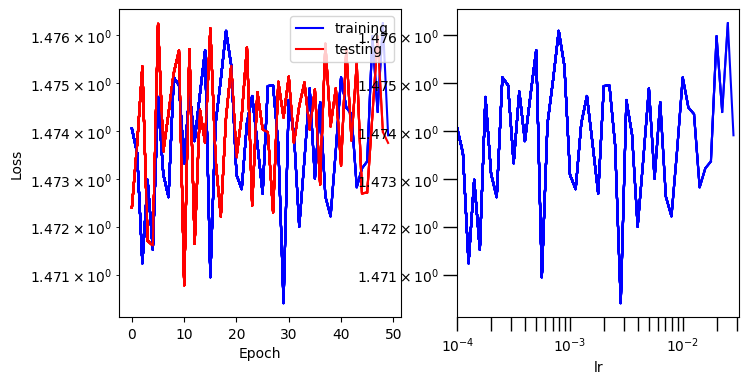

cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda
cuda


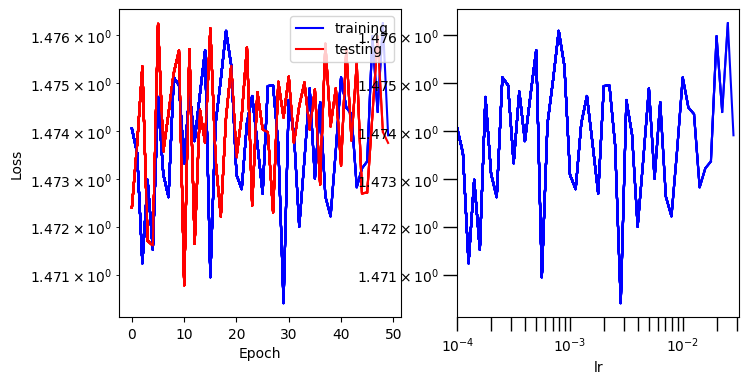

In [9]:
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
import tqdm
from tqdm import tqdm_notebook
from IPython import display
import torch.nn as nn
from Conv4d import Conv4d
from tqdm.notebook import tqdm as tqdm_notebook

#print(files_list_)
training_file_path = 'dataset/toy_model.pt'
filename = training_file_path
loaded_file = torch.load(filename, map_location=torch.device(device))

inject_energy = loaded_file[1]
events        = loaded_file[0]

training_dataset = events[:10000]
training_inject_energy = inject_energy[:10000]
#print(training_inject_energy)
testing_dataset  = events[10000:]
testing_inject_energy  = inject_energy[10000:]
counter=0

# Instantiate model each time (re-initialises weights)
#model_tmp=trans_tdsm.Gen(n_feat_dim, embed_dim, hidden_dim, num_encoder_blocks, num_attn_heads, dropout_gen, marginal_prob_std=marginal_prob_std_fn)
model_tmp=Gen(4, 400, 256, 10, 1, 0, marginal_prob_std=new_marginal_prob_std_fn)
train_ratio = 0.8
# Run the thing
n_epochs = 50
lr_ = 0.0001
epochs = tqdm_notebook(range(n_epochs))
optimiser = torch.optim.RAdam(model_tmp.parameters(),lr=lr_)
av_training_losses_per_epoch = []
av_testing_losses_per_epoch = []

lambda1 = lambda epoch: 10**(epoch / 20)
scheduler = lr_scheduler.LambdaLR(optimiser, lr_lambda=lambda1)
#scheduler = lr_scheduler.LinearLR(optimiser, start_factor=0.001, end_factor=1.0, total_iters=n_epochs)
#scheduler = lr_scheduler.ExponentialLR(optimiser, gamma=0.99)

fig, ax = plt.subplots(ncols=2, figsize=(8,4))
dh = display.display(fig, display_id=True)
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epoch')
ax[0].set_yscale('log')
ax[1].set_xlabel('lr')
ax[1].set_xlim(lr_,lr_*10**(n_epochs/20))
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].tick_params('both', length=10, width=1, which='both')

lrs_ = []
#print(files_list_)

for epoch in epochs:

    # Create/clear per epoch variables
    cumulative_epoch_loss = 0.
    cumulative_test_epoch_loss = 0.

    file_counter = 0
    n_training_showers = 0
    n_testing_showers = 0
    training_batches_per_epoch = 0
    testing_batches_per_epoch = 0

    # Load files
    for filename in training_file_path:
        # custom_data = utils.cloud_dataset(filename, device=device)
        # train_size = int(train_ratio * len(custom_data.data))
        # test_size = len(custom_data.data) - train_size
        # train_dataset, test_dataset = torch.utils.data.random_split(custom_data, [train_size, test_size])

        # n_training_showers+=train_size
        # n_testing_showers+=test_size
        # # Load clouds for each epoch of data dataloaders length will be the number of batches
        shower_loader_train = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
        shower_loader_test = DataLoader(testing_dataset, batch_size=batch_size, shuffle=True)

        # Accumuate number of batches per epoch
        training_batches_per_epoch += len(shower_loader_train)
        testing_batches_per_epoch += len(shower_loader_test)

        # Load shower batch for training
        for i, shower_data in enumerate(shower_loader_train,0):
            # Move model to device and set dtype as same as data (note torch.double works on both CPU and GPU)
            incident_energies = training_inject_energy[i*batch_size: i*batch_size+len(data)]
            model_tmp.to(device, shower_data.dtype)
            model_tmp.train()
            shower_data = shower_data.to(device)
            incident_energies = incident_energies.to(device)

            if len(shower_data) < 1:
                print('Very few hits in shower: ', len(shower_data))
                continue
            # Zero any gradients from previous steps
            optimiser.zero_grad()
            # Loss average for each batch
            loss = loss_fn(model, shower_data, incident_energies, new_marginal_prob_std_fn, device=device)
            # Accumulate batch loss per epoch
            cumulative_epoch_loss+=float(loss)
            # collect dL/dx for any parameters (x) which have requires_grad = True via: x.grad += dL/dx
            loss.backward()
            # Update value of x += -lr * x.grad
            optimiser.step()

        # Testing on subset of file
        for i, shower_data in enumerate(shower_loader_test,0):
            with torch.no_grad():
                model_tmp.eval()
                shower_data = shower_data.to(device)
                #incident_energies = incident_energies.to(device)
                incident_energies = testing_inject_energy[i*batch_size: i*batch_size+len(data)]
                test_loss = loss_fn(model, shower_data, incident_energies, new_marginal_prob_std_fn, device=device)
                cumulative_test_epoch_loss+=float(test_loss)

    # Calculate average loss per epoch
    av_training_losses_per_epoch.append(cumulative_epoch_loss/training_batches_per_epoch)
    av_testing_losses_per_epoch.append(cumulative_test_epoch_loss/testing_batches_per_epoch)
    epochs.set_description('Average Loss: {:5f}(Train) {:5f}(Test)'.format(cumulative_epoch_loss/training_batches_per_epoch, cumulative_test_epoch_loss/testing_batches_per_epoch))
    ax[0].plot(av_training_losses_per_epoch, c='blue', label='training')
    ax[0].plot(av_testing_losses_per_epoch, c='red', label='testing')
    if epoch == 0:
        ax[0].legend(loc='upper right')
    
    # End of epoch, change the learning rate
    before_lr = optimiser.param_groups[0]['lr']
    scheduler.step()
    after_lr = optimiser.param_groups[0]['lr']
    print("Epoch: %d: lr: %.7f -> %.7f , Loss: %.7f" % (epoch, before_lr, after_lr, cumulative_epoch_loss/training_batches_per_epoch))
    lrs_.append(before_lr)
    # Plot the loss in log scale
    ax[1].plot(lrs_, av_training_losses_per_epoch, c='blue')
    dh.update(fig)
    fig.savefig(os.path.join(output_directory, 'loss_test'+str(epoch)+'.png'))
